In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car  = pd.read_csv('car data.csv')
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car.shape

(301, 9)

In [7]:
#getting some info about dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
print(car.Fuel_Type.value_counts())
print(car.Seller_Type.value_counts())
print(car.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [14]:
# Encoding the categorical data
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car.replace({'Seller_Type':{'Dealer':0,'Individual':1,}},inplace=True)
car.replace({'Transmission':{'Manual':0,'Automatic':1,}},inplace=True)
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [19]:
x = car.drop(['Car_Name','Selling_Price'],axis=1)
y = car['Selling_Price']

In [20]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=2)

In [22]:
lrmodel = LinearRegression()
lrmodel.fit(xtrain,ytrain)


LinearRegression()

In [23]:
trainpred = lrmodel.predict(xtrain)
# trainacc = accuracy_score(trainpred,ytrain)
error_score = metrics.r2_score(ytrain,trainpred)
print('R squared error : ',error_score)

R squared error :  0.8799451660493711


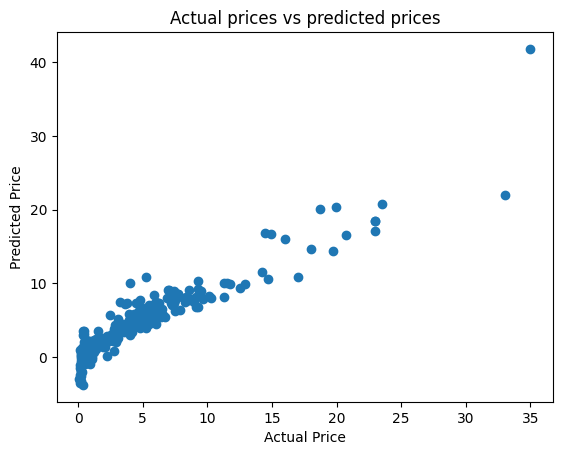

In [26]:
plt.scatter(ytrain,trainpred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices vs predicted prices')
plt.show()


In [27]:
testpred = lrmodel.predict(xtest)

In [30]:
error_score = metrics.r2_score(ytest,testpred)
print('R squared error :', error_score)

R squared error : 0.8365766715027051


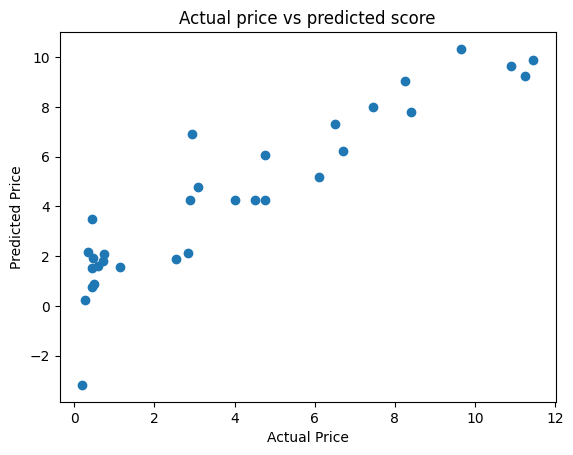

In [31]:
plt.scatter(ytest,testpred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual price vs predicted score")
plt.show()

In [33]:
# Lasso Regression
lassomodel = Lasso()
lassomodel.fit(xtrain,ytrain)

Lasso()

In [34]:
trainpred = lassomodel.predict(xtrain)
errorscore = metrics.r2_score(ytrain,trainpred)
print("R squared error :",error_score)

R squared error : 0.8365766715027051


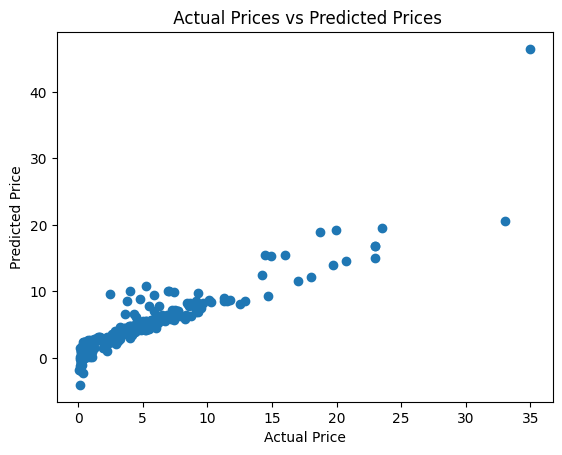

In [35]:
plt.scatter(ytrain, trainpred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [36]:
testpred = lassomodel.predict(xtest)
error = metrics.r2_score(ytest,testpred)
print("R squared error :",error)

R squared error : 0.8709167941173195


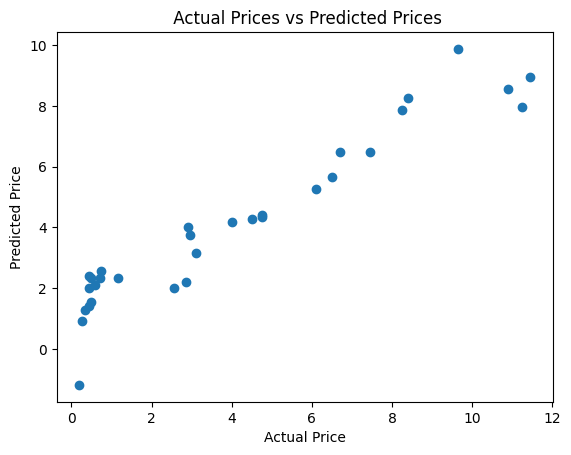

In [37]:
plt.scatter(ytest, testpred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()